Starting Cancer Image Classification Pipeline
Step 1: Extracting zip file...
Zip file extracted to: ./cancer_extracted

Step 2: Exploring directory structure...
cancer_extracted/
  complete_set/
    testing_set/
      P036.png
      P067_mask.png
      P089.png
      P063_mask.png
      P054_mask.png
      ... and 195 more files
    training_set/
      benign/
        benign (285)_mask.png
        benign (198).png
        benign (64)_mask.png
        benign (54)_mask.png
        benign (171)_mask.png
        ... and 786 more files
      malignant/
        malignant (13)_mask.png
        malignant (79).png
        malignant (114)_mask.png
        malignant (135)_mask.png
        malignant (4)_mask.png
        ... and 316 more files
  training_set/
    benign/
      benign (285)_mask.png
      benign (198).png
      benign (64)_mask.png
      benign (54)_mask.png
      benign (171)_mask.png
      ... and 786 more files
    malignant/
      malignant (13)_mask.png
      malignant (79).png

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,026 (12.64 MB)

 Trainable params: 3,313,026 (12.64 MB)

 Non-trainable params: 0 (0.00 B)


Step 8: Training model...
Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.6380 - loss: 0.6731 - val_accuracy: 0.7130 - val_loss: 0.6296 - learning_rate: 0.0010
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.7154 - loss: 0.6314 - val_accuracy: 0.7130 - val_loss: 0.5797 - learning_rate: 0.0010
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.7056 - loss: 0.6028 - val_accuracy: 0.7130 - val_loss: 0.5485 - learning_rate: 0.0010
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.7128 - loss: 0.5760 - val_accuracy: 0.7130 - val_loss: 0.5561 - learning_rate: 0.0010
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7429 - loss: 0.5646 - val_accuracy: 0.7489 - val_loss: 0.5620 - learning_rate: 0.0010
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7252 - loss: 0.5704 - val_accuracy: 0.7623 - val_loss: 0.5433 - learning_rate: 0.0010
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accura

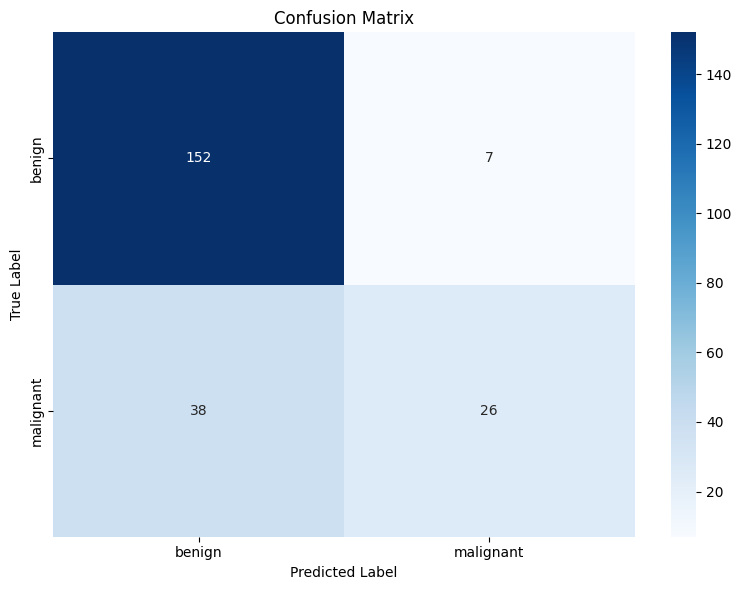

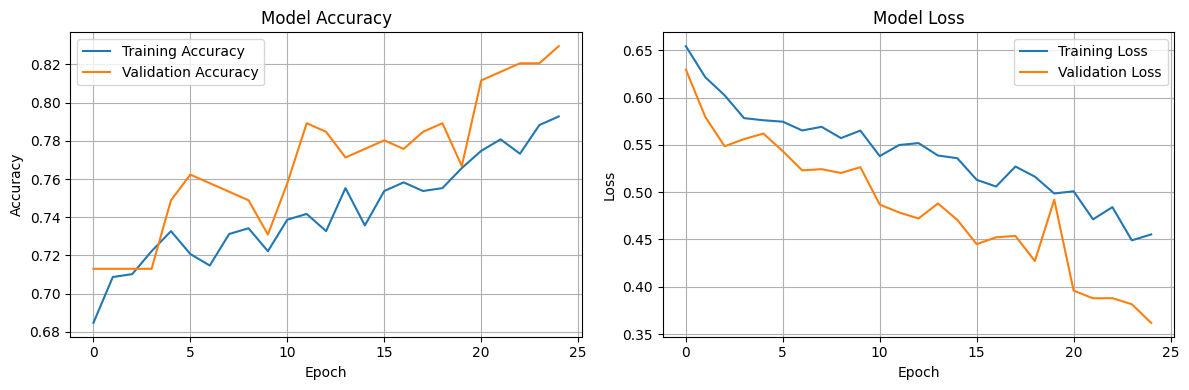


PIPELINE COMPLETED SUCCESSFULLY!
Final Test Accuracy: 0.7982
Final Test F1-Score: 0.7749
Model saved as 'cancer_classification_model.h5'


In [1]:
# Cancer Image Classification - Complete Pipeline
# This script preprocesses, trains, and evaluates a model for cancer image classification

import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class CancerImageClassifier:
    def __init__(self, root_dir='.'):
        """
        Initialize the Cancer Image Classifier

        Parameters:
        root_dir (str): Root directory where cancer.zip is located
        """
        self.root_dir = root_dir
        self.zip_path = os.path.join(root_dir, 'cancer.zip')
        self.extracted_path = os.path.join(root_dir, 'cancer_extracted')
        self.data = []
        self.labels = []
        self.class_names = ['benign', 'malignant']
        self.model = None
        self.history = None

    def extract_zip_file(self):
        """
        Extract the cancer.zip file to the specified directory
        """
        print("Step 1: Extracting zip file...")

        # Check if zip file exists
        if not os.path.exists(self.zip_path):
            raise FileNotFoundError(f"Zip file not found at {self.zip_path}")

        # Create extraction directory if it doesn't exist
        if not os.path.exists(self.extracted_path):
            os.makedirs(self.extracted_path)

        # Extract zip file
        with zipfile.ZipFile(self.zip_path, 'r') as zip_ref:
            zip_ref.extractall(self.extracted_path)

        print(f"Zip file extracted to: {self.extracted_path}")

    def explore_directory_structure(self):
        """
        Explore and understand the directory structure of the extracted data
        """
        print("\nStep 2: Exploring directory structure...")

        def print_directory_tree(startpath, max_level=3):
            for root, dirs, files in os.walk(startpath):
                level = root.replace(startpath, '').count(os.sep)
                if level <= max_level:
                    indent = ' ' * 2 * level
                    print(f"{indent}{os.path.basename(root)}/")
                    subindent = ' ' * 2 * (level + 1)
                    for file in files[:5]:  # Show first 5 files only
                        print(f"{subindent}{file}")
                    if len(files) > 5:
                        print(f"{subindent}... and {len(files) - 5} more files")

        print_directory_tree(self.extracted_path)

    def find_image_paths(self):
        """
        Find all image paths and their corresponding labels
        Returns list of (image_path, label) tuples
        """
        print("\nStep 3: Finding image paths and labels...")

        image_paths = []

        # Define possible directory structures based on the description
        possible_structures = [
            # Structure 1: complete_set with testing_set and training_set
            {
                'base': ['complete_set', 'training_set'],
                'benign': os.path.join('complete_set', 'training_set', 'benign'),
                'malignant': os.path.join('complete_set', 'training_set', 'malignant')
            },
            # Structure 2: separate training_set folder
            {
                'base': ['training_set'],
                'benign': os.path.join('training_set', 'benign'),
                'malignant': os.path.join('training_set', 'malignant')
            }
        ]

        # Try different possible directory structures
        for structure in possible_structures:
            benign_path = os.path.join(self.extracted_path, structure['benign'])
            malignant_path = os.path.join(self.extracted_path, structure['malignant'])

            if os.path.exists(benign_path) and os.path.exists(malignant_path):
                print(f"Found directory structure: {structure['base']}")

                # Get benign images
                for img_file in os.listdir(benign_path):
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                        image_paths.append((os.path.join(benign_path, img_file), 'benign'))

                # Get malignant images
                for img_file in os.listdir(malignant_path):
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                        image_paths.append((os.path.join(malignant_path, img_file), 'malignant'))

                break

        if not image_paths:
            # Fallback: search recursively for image files
            print("Standard structure not found. Searching recursively for images...")
            for root, dirs, files in os.walk(self.extracted_path):
                for file in files:
                    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                        full_path = os.path.join(root, file)
                        # Determine label based on parent directory name
                        parent_dir = os.path.basename(root).lower()
                        if 'benign' in parent_dir:
                            image_paths.append((full_path, 'benign'))
                        elif 'malignant' in parent_dir:
                            image_paths.append((full_path, 'malignant'))
                        else:
                            # If cannot determine, skip or assign manually
                            continue

        print(f"Found {len(image_paths)} total images")
        print(f"Benign images: {len([p for p in image_paths if p[1] == 'benign'])}")
        print(f"Malignant images: {len([p for p in image_paths if p[1] == 'malignant'])}")

        return image_paths

    def load_and_preprocess_images(self, image_paths, target_size=(128, 128)):
        """
        Load and preprocess images

        Parameters:
        image_paths (list): List of (image_path, label) tuples
        target_size (tuple): Target size for resizing images

        Returns:
        X (numpy array): Preprocessed images
        y (numpy array): Encoded labels
        """
        print("\nStep 4: Loading and preprocessing images...")

        X = []
        y = []

        for img_path, label in image_paths:
            try:
                # Load image
                img = Image.open(img_path)

                # Convert to RGB if necessary
                if img.mode != 'RGB':
                    img = img.convert('RGB')

                # Resize image
                img = img.resize(target_size)

                # Convert to numpy array and normalize
                img_array = np.array(img) / 255.0

                X.append(img_array)
                y.append(label)

            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue

        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)

        print(f"Successfully loaded {len(X)} images")
        print(f"Image shape: {X[0].shape}")

        return X, y

    def encode_labels(self, y):
        """
        Encode string labels to numerical values

        Parameters:
        y (array): String labels

        Returns:
        y_encoded (array): Numerically encoded labels
        label_encoder: Fitted LabelEncoder
        """
        print("\nStep 5: Encoding labels...")

        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)

        print("Label mapping:")
        for i, class_name in enumerate(self.label_encoder.classes_):
            print(f"  {class_name} -> {i}")

        return y_encoded

    def split_data(self, X, y, test_size=0.2, val_size=0.2):
        """
        Split data into training, validation, and test sets

        Parameters:
        X (array): Features
        y (array): Labels
        test_size (float): Proportion of test set
        val_size (float): Proportion of validation set from training set

        Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
        """
        print("\nStep 6: Splitting data...")

        # First split: separate test set
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        # Second split: separate validation set from temporary set
        val_ratio = val_size / (1 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_ratio, random_state=42, stratify=y_temp
        )

        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Validation set: {X_val.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")

        return X_train, X_val, X_test, y_train, y_val, y_test

    def create_model(self, input_shape, num_classes):
        """
        Create a CNN model for image classification

        Parameters:
        input_shape (tuple): Shape of input images
        num_classes (int): Number of output classes

        Returns:
        model: Compiled Keras model
        """
        print("\nStep 7: Creating CNN model...")

        model = Sequential([
            # First convolutional block
            Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
            MaxPooling2D((2, 2)),

            # Second convolutional block
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),

            # Third convolutional block
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),

            # Flatten and dense layers
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(num_classes, activation='softmax')
        ])

        # Compile the model
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        print("Model architecture:")
        model.summary()

        return model

    def train_model(self, X_train, y_train, X_val, y_val, epochs=25, batch_size=32):
        """
        Train the CNN model

        Parameters:
        X_train, y_train: Training data
        X_val, y_val: Validation data
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training

        Returns:
        history: Training history
        """
        print("\nStep 8: Training model...")

        # Data augmentation for training
        train_datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            zoom_range=0.2,
            shear_range=0.2,
            fill_mode='nearest'
        )

        # Early stopping to prevent overfitting
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )

        # Reduce learning rate on plateau
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-7
        )

        # Train the model
        self.history = self.model.fit(
            train_datagen.flow(X_train, y_train, batch_size=batch_size),
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        return self.history

    def evaluate_model(self, X_test, y_test):
        """
        Evaluate the trained model on test data

        Parameters:
        X_test, y_test: Test data

        Returns:
        accuracy (float): Test accuracy
        f1 (float): F1 score
        """
        print("\nStep 9: Evaluating model...")

        # Make predictions
        y_pred_proba = self.model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Print detailed report
        print("\n" + "="*50)
        print("MODEL EVALUATION RESULTS")
        print("="*50)
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test F1-Score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=self.label_encoder.classes_))

        # Plot confusion matrix
        self.plot_confusion_matrix(y_test, y_pred)

        # Plot training history
        self.plot_training_history()

        return accuracy, f1

    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot confusion matrix
        """
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.label_encoder.classes_,
                   yticklabels=self.label_encoder.classes_)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

    def plot_training_history(self):
        """
        Plot training history (accuracy and loss)
        """
        if self.history is None:
            print("No training history available.")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot accuracy
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)

        # Plot loss
        ax2.plot(self.history.history['loss'], label='Training Loss')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def run_complete_pipeline(self):
        """
        Run the complete pipeline from data loading to model evaluation
        """
        print("Starting Cancer Image Classification Pipeline")
        print("=" * 50)

        try:
            # Step 1: Extract zip file
            self.extract_zip_file()

            # Step 2: Explore directory structure
            self.explore_directory_structure()

            # Step 3: Find image paths
            image_paths = self.find_image_paths()

            if not image_paths:
                raise ValueError("No images found in the dataset!")

            # Step 4: Load and preprocess images
            X, y_strings = self.load_and_preprocess_images(image_paths)

            # Step 5: Encode labels
            y = self.encode_labels(y_strings)

            # Step 6: Split data
            X_train, X_val, X_test, y_train, y_val, y_test = self.split_data(X, y)

            # Step 7: Create model
            self.model = self.create_model(X_train[0].shape, len(np.unique(y)))

            # Step 8: Train model
            self.train_model(X_train, y_train, X_val, y_val)

            # Step 9: Evaluate model
            accuracy, f1 = self.evaluate_model(X_test, y_test)

            print("\n" + "="*50)
            print("PIPELINE COMPLETED SUCCESSFULLY!")
            print("="*50)
            print(f"Final Test Accuracy: {accuracy:.4f}")
            print(f"Final Test F1-Score: {f1:.4f}")

            return accuracy, f1

        except Exception as e:
            print(f"Error in pipeline: {e}")
            raise

# Main execution
if __name__ == "__main__":
    # Initialize the classifier
    classifier = CancerImageClassifier()

    # Run the complete pipeline
    accuracy, f1_score = classifier.run_complete_pipeline()

    # Save the model
    classifier.model.save('cancer_classification_model.h5')
    print("Model saved as 'cancer_classification_model.h5'")